In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
df = pd.read_csv("Retail_Transactions_Dataset.csv")

In [3]:
df.shape

(1000000, 13)

In [5]:
print(df.head())

   Transaction_ID                 Date      Customer_Name  \
0      1000000000  2022-01-21 06:27:29       Stacey Price   
1      1000000001  2023-03-01 13:01:21   Michelle Carlson   
2      1000000002  2024-03-21 15:37:04        Lisa Graves   
3      1000000003  2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004  2020-12-10 00:59:59     Susan Mitchell   

                                             Product  Total_Items  Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
2                                        ['Spinach']            6       41.49   
3                             ['Tissues', 'Mustard']            1       39.34   
4                                      ['Dish Soap']           10       16.42   

   Payment_Method           City        Store_Type  Discount_Applied  \
0  Mobile Payment    Los Angeles    Warehouse Club              True   
1 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  bool   
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          666057 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 92.5+ MB


In [9]:
df.isnull().sum()

Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64

In [11]:
df['Store_Type'].unique()

array(['Warehouse Club', 'Specialty Store', 'Department Store',
       'Pharmacy', 'Supermarket', 'Convenience Store'], dtype=object)

In [13]:
df[['Total_Cost', 'Total_Items']].describe()

,Total_Cost,Total_Items
count,1000000.000000,1000000.000000
mean,52.455220,5.495941
std,27.416989,2.871654
min,5.000000,1.000000
25%,28.710000,3.000000
50%,52.420000,5.000000
75%,76.190000,8.000000
max,100.000000,10.000000


In [15]:
df['Customer_Category'].value_counts()
df['Store_Type'].value_counts()
df['Season'].value_counts()

Season
Spring    250368
Fall      250248
Winter    249763
Summer    249621
Name: count, dtype: int64

In [23]:
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Data Types:
 Transaction_ID         int64
Date                  object
Customer_Name         object
Product               object
Total_Items            int64
Total_Cost           float64
Payment_Method        object
City                  object
Store_Type            object
Discount_Applied        bool
Customer_Category     object
Season                object
Promotion             object
dtype: object

Missing Values:
 Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64


In [19]:
print("\nNumerical Summary:\n", df[['Total_Cost', 'Total_Items']].describe())


Numerical Summary:
            Total_Cost     Total_Items
count  1000000.000000  1000000.000000
mean        52.455220        5.495941
std         27.416989        2.871654
min          5.000000        1.000000
25%         28.710000        3.000000
50%         52.420000        5.000000
75%         76.190000        8.000000
max        100.000000       10.000000


In [21]:
print("\nCustomer Category:\n", df['Customer_Category'].value_counts())
print("\nStore Type:\n", df['Store_Type'].value_counts())
print("\nSeason:\n", df['Season'].value_counts())
print("\nPayment Method:\n", df['Payment_Method'].value_counts())
print("\nDiscount Applied:\n", df['Discount_Applied'].value_counts())


Customer Category:
 Customer_Category
Senior Citizen    125485
Homemaker         125418
Teenager          125319
Retiree           125072
Student           124842
Professional      124651
Middle-Aged       124636
Young Adult       124577
Name: count, dtype: int64

Store Type:
 Store_Type
Supermarket          166936
Pharmacy             166915
Convenience Store    166749
Warehouse Club       166685
Department Store     166614
Specialty Store      166101
Name: count, dtype: int64

Season:
 Season
Spring    250368
Fall      250248
Winter    249763
Summer    249621
Name: count, dtype: int64

Payment Method:
 Payment_Method
Cash              250230
Debit Card        250074
Credit Card       249985
Mobile Payment    249711
Name: count, dtype: int64

Discount Applied:
 Discount_Applied
True     500104
False    499896
Name: count, dtype: int64


In [29]:
avg_cost = df.groupby('Customer_Category')['Total_Cost'].mean().sort_values(ascending=False)
print("Average Total Cost by Customer Category:\n", avg_cost, "\n")

Average Total Cost by Customer Category:
 Customer_Category
Teenager          52.529091
Professional      52.525762
Student           52.487994
Homemaker         52.461417
Young Adult       52.448246
Retiree           52.435589
Middle-Aged       52.411318
Senior Citizen    52.342672
Name: Total_Cost, dtype: float64 



In [31]:
avg_items = df.groupby('Customer_Category')['Total_Items'].mean().sort_values(ascending=False)
print("Average Total Items by Customer Category:\n", avg_items, "\n")

Average Total Items by Customer Category:
 Customer_Category
Retiree           5.505461
Homemaker         5.502464
Middle-Aged       5.501388
Student           5.496788
Young Adult       5.495549
Senior Citizen    5.493525
Teenager          5.489670
Professional      5.482660
Name: Total_Items, dtype: float64 



In [33]:
discount_usage = df.groupby('Customer_Category')['Discount_Applied'].mean().sort_values(ascending=False)
print("Proportion of Discount Usage by Customer Category:\n", discount_usage, "\n")

Proportion of Discount Usage by Customer Category:
 Customer_Category
Retiree           0.502191
Young Adult       0.500927
Homemaker         0.500614
Senior Citizen    0.500410
Student           0.499848
Middle-Aged       0.499222
Teenager          0.498935
Professional      0.498680
Name: Discount_Applied, dtype: float64 



In [35]:
store_preference = df.groupby(['Customer_Category', 'Store_Type']).size().unstack().fillna(0)
top_store_per_category = store_preference.apply(lambda x: x.nlargest(2).index.tolist(), axis=1)
print("Top 2 Store Type Preferences by Customer Category:\n", top_store_per_category, "\n")

Top 2 Store Type Preferences by Customer Category:
 Customer_Category
Homemaker                [Warehouse Club, Supermarket]
Middle-Aged            [Department Store, Supermarket]
Professional      [Convenience Store, Specialty Store]
Retiree           [Convenience Store, Specialty Store]
Senior Citizen           [Convenience Store, Pharmacy]
Student                  [Pharmacy, Convenience Store]
Teenager                 [Supermarket, Warehouse Club]
Young Adult            [Department Store, Supermarket]
dtype: object 



In [37]:
season_preference = df.groupby(['Customer_Category', 'Season']).size().unstack().fillna(0)
top_season_per_category = season_preference.apply(lambda x: x.nlargest(2).index.tolist(), axis=1)
print("Top 2 Seasonal Shopping Preferences by Customer Category:\n", top_season_per_category)

Top 2 Seasonal Shopping Preferences by Customer Category:
 Customer_Category
Homemaker           [Fall, Spring]
Middle-Aged       [Summer, Winter]
Professional        [Spring, Fall]
Retiree           [Winter, Summer]
Senior Citizen      [Fall, Summer]
Student             [Fall, Spring]
Teenager          [Winter, Spring]
Young Adult       [Spring, Summer]
dtype: object


In [51]:
df['Date'] = pd.to_datetime(df['Date'])

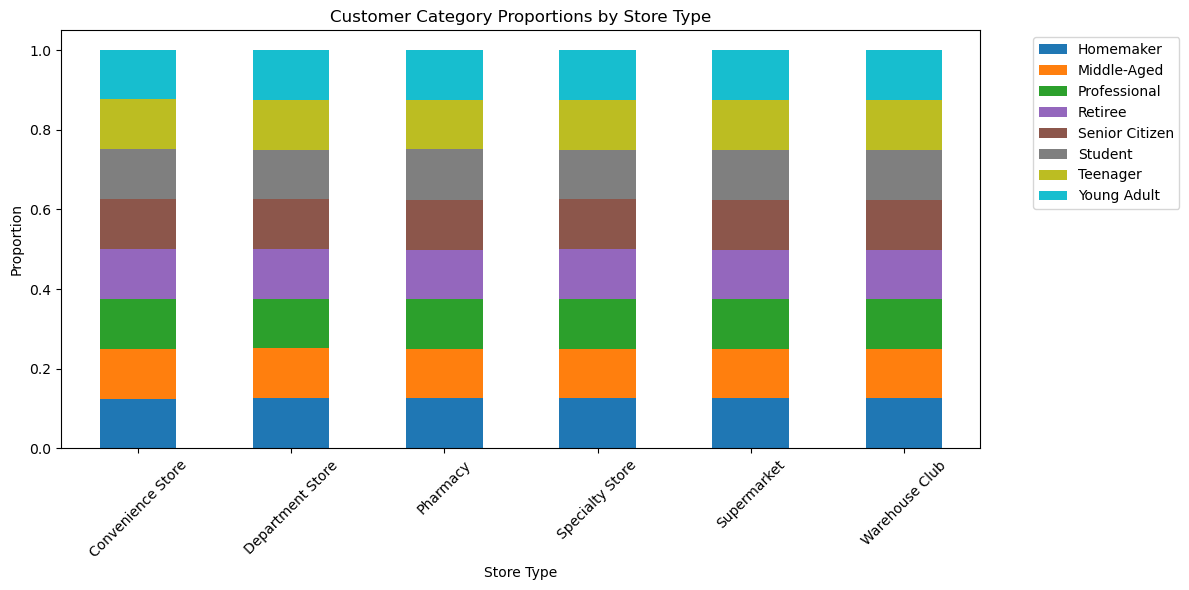

In [56]:
store_cat_prop = pd.crosstab(df['Store_Type'], df['Customer_Category'], normalize='index')
store_cat_prop.plot(kind='bar', stacked=True, colormap='tab10', figsize=(12,6))
plt.title("Customer Category Proportions by Store Type")
plt.ylabel("Proportion")
plt.xlabel("Store Type")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

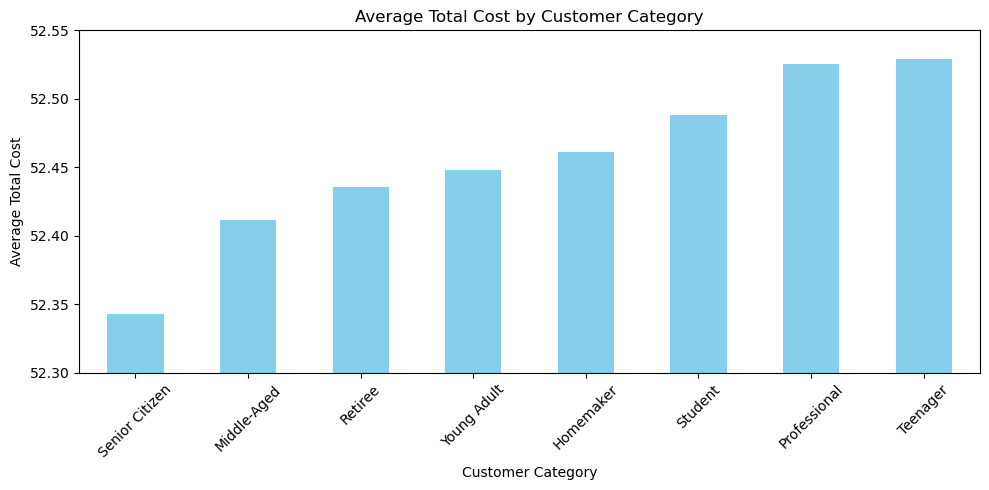

In [58]:
avg_cost = df.groupby('Customer_Category')['Total_Cost'].mean().sort_values()
plt.figure(figsize=(10, 5))
avg_cost.plot(kind='bar', color='skyblue')
plt.title("Average Total Cost by Customer Category")
plt.ylabel("Average Total Cost")
plt.xlabel("Customer Category")
plt.xticks(rotation=45)
plt.ylim(52.3, 52.55)
plt.tight_layout()
plt.show()

C:\Users\shrid\AppData\Local\Temp\ipykernel_22540\3082332219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Customer_Category', y='Total_Cost', palette='Set3')


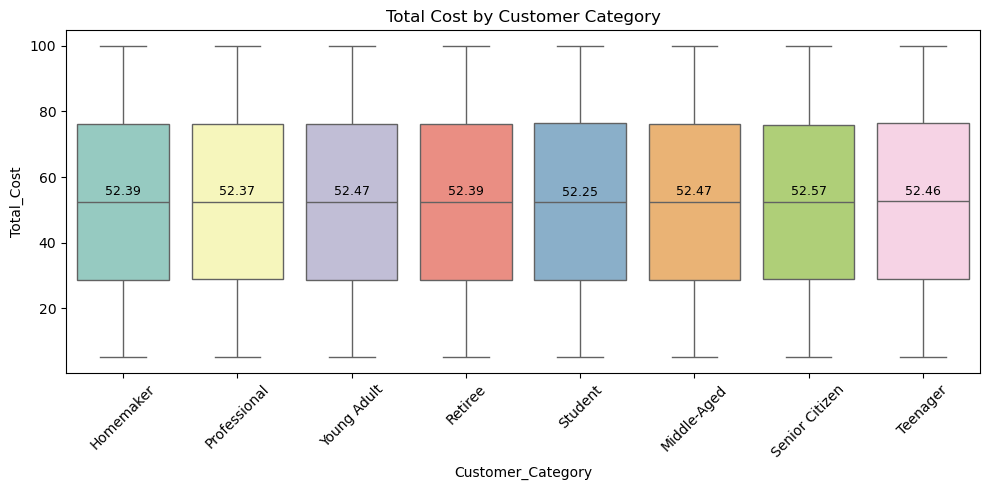

In [63]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=df, x='Customer_Category', y='Total_Cost', palette='Set3')
plt.title("Total Cost by Customer Category")
plt.xticks(rotation=45)
medians = df.groupby('Customer_Category')['Total_Cost'].median().values
for tick, median in zip(ax.get_xticks(), medians):
    ax.text(tick, median + 2, f'{median:.2f}', horizontalalignment='center', size=9, color='black')
plt.tight_layout()
plt.show()

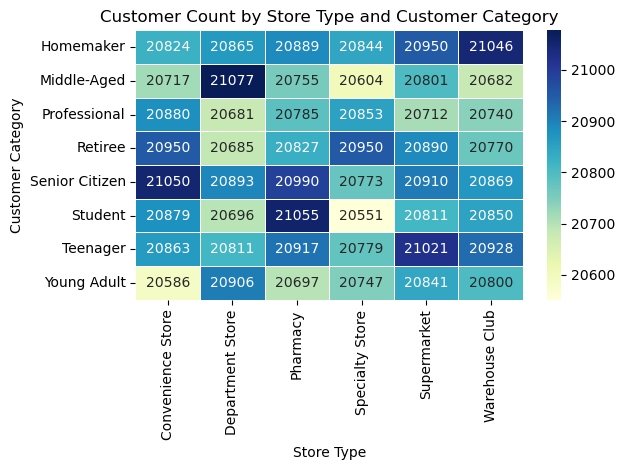

In [66]:
cross_tab = pd.crosstab(df['Customer_Category'], df['Store_Type'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title("Customer Count by Store Type and Customer Category")
plt.ylabel("Customer Category")
plt.xlabel("Store Type")
plt.tight_layout()
plt.show()

In [68]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop non-predictive columns
df_cleaned = df.drop(columns=['Transaction_ID', 'Customer_Name', 'Product', 'Date', 'City'])

# Fill missing values in 'Promotion'
df_cleaned['Promotion'] = df_cleaned['Promotion'].fillna('None')

# Encode categorical columns
categorical_cols = ['Payment_Method', 'Store_Type', 'Promotion', 'Season', 'Customer_Category']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Save for later decoding if needed

# Scale numerical features
scaler = StandardScaler()
df_cleaned[['Total_Cost', 'Total_Items']] = scaler.fit_transform(df_cleaned[['Total_Cost', 'Total_Items']])

df_cleaned.head()

,Total_Items,Total_Cost,Payment_Method,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,-0.869165,0.700106,3,5,True,0,3,2
1,-1.217397,-0.967474,0,3,True,2,0,0
2,0.175529,-0.399943,1,1,True,2,3,2
3,-1.565628,-0.478361,3,2,True,0,1,2
4,1.568455,-1.314340,2,3,False,7,3,1


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

df = df.drop(columns=['Transaction_ID', 'Customer_Name', 'Product', 'Date', 'City'])

df['Promotion'] = df['Promotion'].fillna('None')

categorical_cols = ['Payment_Method', 'Store_Type', 'Promotion', 'Season', 'Customer_Category']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df['Discount_Applied'] = df['Discount_Applied'].astype(int)
scaler = StandardScaler()
df[['Total_Cost', 'Total_Items']] = scaler.fit_transform(df[['Total_Cost', 'Total_Items']])

# Train/test split
X = df.drop(columns=['Customer_Category'])
y = df['Customer_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Models and parameter grids
models_and_params = {
    'LogisticRegression': (
        LogisticRegression(max_iter=200),
        {'penalty': ['l2'], 'solver': ['lbfgs']}
    ),
    'DecisionTree': (
        DecisionTreeClassifier(),
        {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5], 'criterion': ['gini', 'entropy']}
    ),
    'RandomForest': (
        RandomForestClassifier(),
        {'n_estimators': [100, 200], 'max_depth': [5, 10], 'class_weight': [None, 'balanced']}
    ),
    'XGBoost': (
        XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.1, 0.05]}
    ),
    'KNN': (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    )
}

# Train and evaluate each model
best_models = {}
for name, (model, param_grid) in models_and_params.items():
    print(f"\n Training {name}...")
    grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    best_models[name] = best_model
    y_pred = best_model.predict(X_test)
    print(f" Best Parameters for {name}: {grid.best_params_}")
    print(f" Classification Report for {name}:\n{classification_report(y_test, y_pred, zero_division=0)}")


 Training LogisticRegression...
 Best Parameters for LogisticRegression: {'penalty': 'l2', 'solver': 'lbfgs'}
 Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.13      0.21      0.16     25084
           1       0.12      0.04      0.06     24927
           2       0.12      0.07      0.09     24930
           3       0.12      0.20      0.15     25015
           4       0.12      0.22      0.16     25097
           5       0.13      0.00      0.00     24968
           6       0.12      0.25      0.17     25064
           7       0.15      0.00      0.00     24915

    accuracy                           0.12    200000
   macro avg       0.13      0.12      0.10    200000
weighted avg       0.13      0.12      0.10    200000


 Training DecisionTree...
 Best Parameters for DecisionTree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
 Classification Report for DecisionTree:
              precision   

C:\Users\shrid\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:54:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
 Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.12      0.14      0.13     25084
           1       0.12      0.10      0.11     24927
           2       0.13      0.12      0.12     24930
           3       0.12      0.13      0.13     25015
           4       0.12      0.15      0.14     25097
           5       0.13      0.11      0.12     24968
           6       0.13      0.12      0.12     25064
           7       0.12      0.12      0.12     24915

    accuracy                           0.12    200000
   macro avg       0.12      0.12      0.12    200000
weighted avg       0.12      0.12      0.12    200000


 Training KNN...
 Best Parameters for KNN: {'n_neighbors': 5, 'weights': 'distance'}
 Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.12      0.12      0.12     25

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Target
y = df['Customer_Category'].copy()
X = df.drop(columns=['Customer_Category']).copy()

# Column groups
num_cols = ['Total_Cost', 'Total_Items']
cat_cols = ['Payment_Method', 'Store_Type', 'Promotion', 'Season', 'Discount_Applied']

# Ensure Discount_Applied is treated as categorical (0/1 but categorical meaning)
X['Discount_Applied'] = X['Discount_Applied'].astype(int)

# Split BEFORE any scaling/encoding (prevents leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

numeric_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols),
    ],
    remainder="drop"
)

# Pipelines
pipe_lr  = Pipeline([("prep", preprocess),
                     ("clf", LogisticRegression(max_iter=300, solver="liblinear"))])

pipe_dt  = Pipeline([("prep", preprocess),
                     ("clf", DecisionTreeClassifier(random_state=42))])

pipe_rf  = Pipeline([("prep", preprocess),
                     ("clf", RandomForestClassifier(random_state=42, n_jobs=-1))])

pipe_knn = Pipeline([("prep", preprocess),
                     ("clf", KNeighborsClassifier())])

# XGBoost
XGB_AVAILABLE = False
try:
    from xgboost import XGBClassifier
    pipe_xgb = Pipeline([("prep", preprocess),
                         ("clf", XGBClassifier(
                             objective="multi:softprob",
                             eval_metric="mlogloss",
                             random_state=42,
                             n_jobs=-1
                         ))])
    XGB_AVAILABLE = True
except Exception:
    print("XGBoost not installed; skipping XGBoost.")

# Grids
param_grids = {
    "LogisticRegression": (pipe_lr, {
        "clf__penalty": ["l1", "l2"],
        "clf__C": [0.01, 0.1, 1, 10]
    }),
    "DecisionTree": (pipe_dt, {
        "clf__max_depth": [3, 5, 10, 15],
        "clf__min_samples_split": [2, 5, 10],
        "clf__criterion": ["gini", "entropy"]
    }),
    "RandomForest": (pipe_rf, {
        "clf__n_estimators": [100, 200],
        "clf__max_depth": [5, 10, 20],
        "clf__min_samples_split": [2, 5],
        "clf__class_weight": [None, "balanced"]
    }),
    "KNN": (pipe_knn, {
        "clf__n_neighbors": [3, 5, 7, 9],
        "clf__weights": ["uniform", "distance"],
        "clf__p": [1, 2]  # Manhattan, Euclidean
    }),
}

if XGB_AVAILABLE:
    param_grids["XGBoost"] = (pipe_xgb, {
        "clf__n_estimators": [100, 200],
        "clf__max_depth": [3, 5, 7],
        "clf__learning_rate": [0.01, 0.1, 0.2]
    })

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
summary_rows = []
fitted = {}
for name, (pipe, grid) in param_grids.items():
    print(f"\n GridSearchCV: {name}")
    gs = GridSearchCV(pipe, grid, cv=cv, scoring="accuracy", n_jobs=-1, verbose=1, return_train_score=False)
    gs.fit(X_train, y_train)

    y_pred = gs.best_estimator_.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f" Best Params: {gs.best_params_}")
    print(f" CV Best Mean Acc: {gs.best_score_:.4f}")
    print(f" Test Accuracy: {acc:.4f}")
    print("\nClassification report (truncated):")
    cr = classification_report(y_test, y_pred, zero_division=0)
    print(cr)

    cv_df = pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)
    show_cols = [c for c in cv_df.columns if c.startswith("param_")] + ["mean_test_score", "std_test_score", "rank_test_score"]
    display(cv_df[show_cols].head(5))

    summary_rows.append({
        "Model": name,
        "Best Params": gs.best_params_,
        "CV Best Mean Acc": round(gs.best_score_, 4),
        "Test Accuracy": round(acc, 4)
    })
    fitted[name] = gs




 GridSearchCV: LogisticRegression
Fitting 3 folds for each of 8 candidates, totalling 24 fits
 Best Params: {'clf__C': 0.1, 'clf__penalty': 'l1'}
 CV Best Mean Acc: 0.1257
 Test Accuracy: 0.1247

Classification report (truncated):
                precision    recall  f1-score   support

     Homemaker       0.13      0.22      0.16     25084
   Middle-Aged       0.12      0.03      0.05     24927
  Professional       0.12      0.09      0.10     24930
       Retiree       0.13      0.20      0.15     25015
Senior Citizen       0.12      0.23      0.16     25097
       Student       0.13      0.00      0.00     24968
      Teenager       0.12      0.22      0.16     25064
   Young Adult       0.15      0.00      0.00     24915

      accuracy                           0.12    200000
     macro avg       0.13      0.12      0.10    200000
  weighted avg       0.13      0.12      0.10    200000



,param_clf__C,param_clf__penalty,mean_test_score,std_test_score,rank_test_score
2,0.1,l1,0.125711,0.000102,1
1,0.01,l2,0.125710,0.000060,2
4,1,l1,0.125703,0.000164,3
3,0.1,l2,0.125696,0.000174,4
6,10,l1,0.125690,0.000156,5



 GridSearchCV: DecisionTree
Fitting 3 folds for each of 24 candidates, totalling 72 fits
 Best Params: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_split': 10}
 CV Best Mean Acc: 0.1257
 Test Accuracy: 0.1247

Classification report (truncated):
                precision    recall  f1-score   support

     Homemaker       0.12      0.19      0.15     25084
   Middle-Aged       0.12      0.11      0.12     24927
  Professional       0.12      0.04      0.06     24930
       Retiree       0.12      0.11      0.11     25015
Senior Citizen       0.13      0.14      0.13     25097
       Student       0.12      0.13      0.13     24968
      Teenager       0.13      0.12      0.12     25064
   Young Adult       0.13      0.16      0.14     24915

      accuracy                           0.12    200000
     macro avg       0.12      0.12      0.12    200000
  weighted avg       0.12      0.12      0.12    200000



,param_clf__criterion,param_clf__max_depth,param_clf__min_samples_split,mean_test_score,std_test_score,rank_test_score
20,entropy,10,10,0.125660,0.000514,1
19,entropy,10,5,0.125658,0.000510,2
18,entropy,10,2,0.125651,0.000519,3
10,gini,15,5,0.125473,0.000501,4
9,gini,15,2,0.125468,0.000487,5



 GridSearchCV: RandomForest
Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\shrid\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:56:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52     25084
           1       0.50      0.46      0.48     24930

    accuracy                           0.50     50014
   macro avg       0.50      0.50      0.50     50014
weighted avg       0.50      0.50      0.50     50014



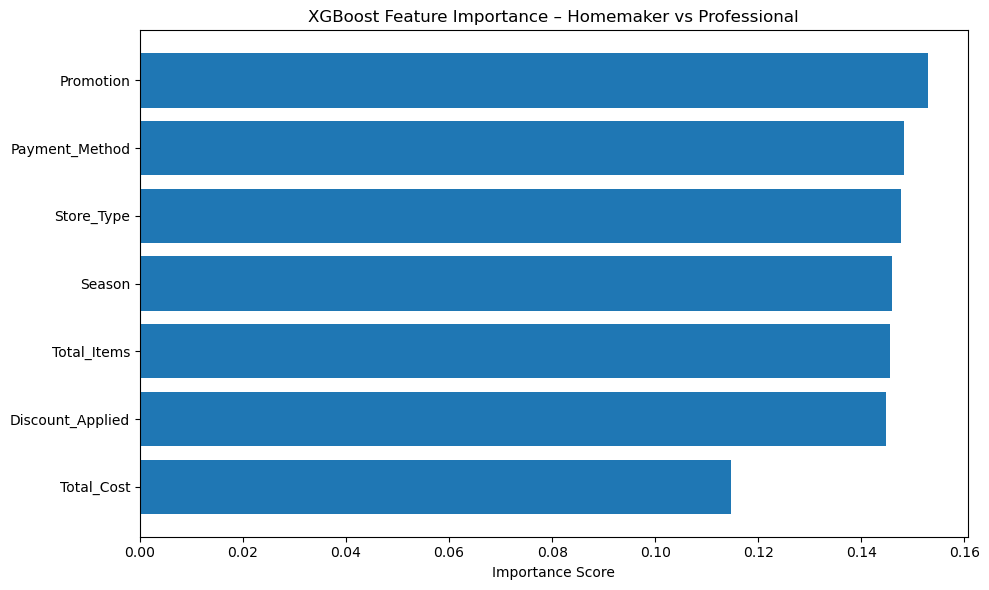

            Feature  Importance
6         Promotion    0.153022
2    Payment_Method    0.148366
3        Store_Type    0.147716
5            Season    0.145938
0       Total_Items    0.145564
4  Discount_Applied    0.144737
1        Total_Cost    0.114656


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Filter to only Homemaker and Professional
df_binary = df[df['Customer_Category'].isin(['Homemaker', 'Professional'])].copy()
df_binary['Customer_Category'] = df_binary['Customer_Category'].map({'Homemaker': 0, 'Professional': 1})

categorical_cols = ['Payment_Method', 'Store_Type', 'Promotion', 'Season']
for col in categorical_cols:
    le = LabelEncoder()
    df_binary[col] = le.fit_transform(df_binary[col])

scaler = StandardScaler()
df_binary[['Total_Cost', 'Total_Items']] = scaler.fit_transform(df_binary[['Total_Cost', 'Total_Items']])

X = df_binary.drop(columns=['Customer_Category', 'Customer_Category_Encoded'])
y = df_binary['Customer_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train XGBoost
model = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(" Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Feature importance
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importance – Homemaker vs Professional")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

print(importance_df)

